Лабораторная работа №7

In [58]:
import math
import numpy as np
from numpy import linspace
from numpy.random import normal, rand
import matplotlib.pyplot as plt


Зададим распределения

In [59]:
def Gauss(u):
  return math.e**(-(math.pi-u)**2/(2*2**2))/(2*math.sqrt(2*math.pi))

In [60]:
def Relay(x):
    return (x / (3 * 3)) * np.exp(-x ** 2 / (2 * 3 * 3))

Метод Rejection Sampling

In [61]:
def rejsamp(N, f, a, b, c):
    X = []
    Y = []
    False_X = []
    False_Y = []
    while len(X) < N:
        x = rand() * (b - a) + a
        y = rand() * c
        
        if y < f(x):
            X.append(x)
            Y.append(y)
        else:
            False_X.append(x)
            False_Y.append(y)
    
    return X, Y, False_X, False_Y

Функция вывода графиков

In [62]:
def rsp(num_samples, distrib_func, a, b, c):
    xs = linspace(a, b, num_samples)
    ys = distrib_func(xs)

    X,Y,False_X,False_Y = rejsamp(num_samples, distrib_func, a, b, c)
    
    plt.hist(X, 50, density=True,color="red")
    plt.plot(xs, ys,color = "blue")
    plt.scatter(X, Y, s=1,color = "yellow")
    plt.scatter(False_X, False_Y, s=1, color = "purple")
    
    plt.xlabel("x")
    plt.ylabel("y")
    
    paddings_factor = 0.05
    x_width = b - a
    y_height = max(np.max(False_Y), np.max(Y))
    
    xlim_shift = x_width * paddings_factor
    ylim_shift = y_height * paddings_factor
    
    plt.xlim(a - xlim_shift , b + xlim_shift)
    plt.ylim(0, np.max(Y))
    
    plt.show()

Протестируем

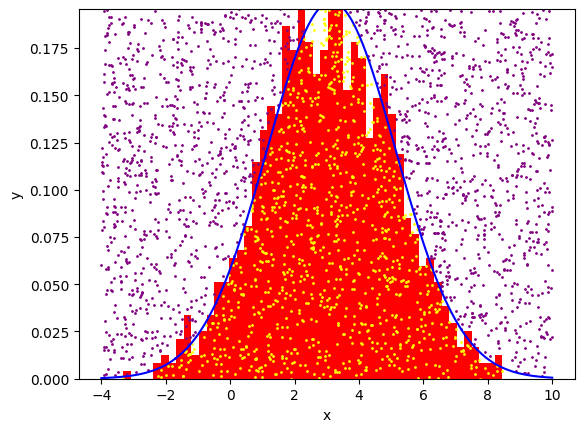

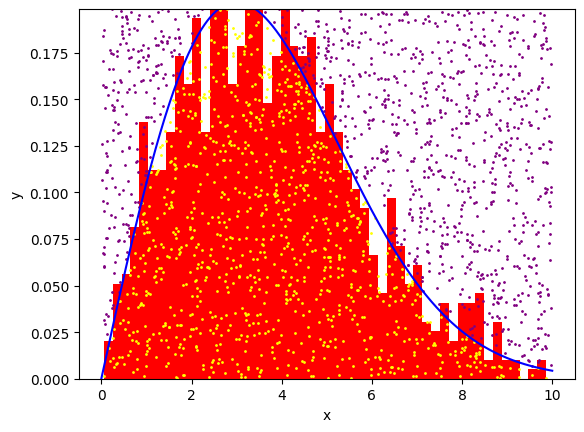

In [63]:
rsp(1000, Gauss, -4, 10, 3)
rsp(1000, Relay, 0, 10, 0.5)

Метод Metropolis hastings

In [64]:
def mhsamp(N, x0, f):
    X = [x0]
    while len(X) < N:
        x_old = X[-1]
        x_new = normal(x_old)
        a = f(x_new)/f(x_old)
        if rand() < a:
            X.append(x_new)
        else:
            X.append(x_old)
    return X

Функция вывода

In [65]:
def mhsp(num_samples, distrib_func, m, a, b, c):
    
    X = mhsamp(num_samples, m, distrib_func)
    xs = np.linspace(a, b, 100)
    ys = distrib_func(xs)
    plt.plot(xs, ys,color = "blue")
    plt.hist(X, 50, density=True,color="red")
    plt.xlabel("x"), plt.ylabel("y"), plt.xlim(a,b), plt.ylim(0, c)
    plt.grid(True)
    plt.show()


Протестируем

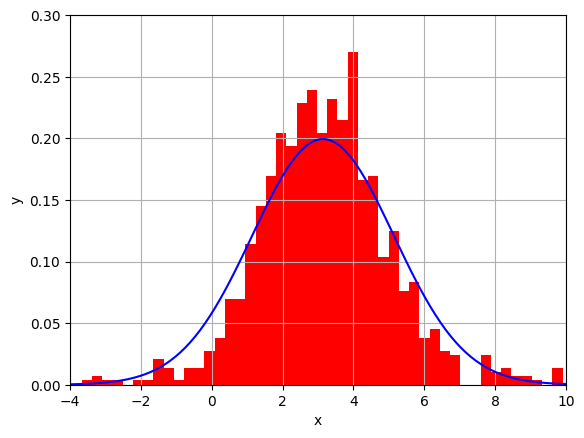

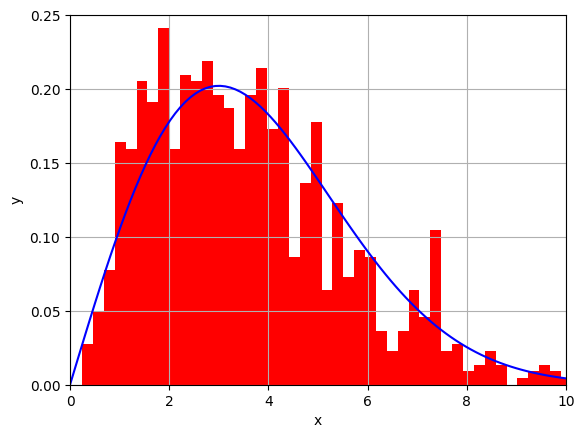

In [66]:
mhsp(1000, Gauss, 1, -4, 10, 0.3)
mhsp(1000, Relay, 3, 0, 10, 0.25)